# MNIST classfication
chapter 3 from Hands-on Machine Learning with Scikit learn keras&Tensorflow

In [4]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [10]:
X,y=mnist['data'],mnist['target']

In [11]:
X.shape,y.shape #28*28 array

((70000, 784), (70000,))

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

(<matplotlib.image.AxesImage at 0x10bfcd240>, 5)

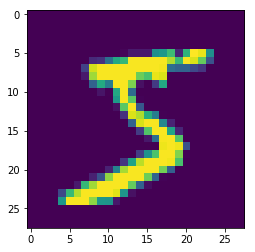

In [20]:
plt.imshow(X[0].reshape(28,28)), y[0]

In [19]:
#cast y to integer
y=y.astype(int)

First create a test set and set it aside
* MNIST already split into training set and test set
* MNIST already shuffled

In [21]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

## Training a binary classifer

In [53]:
#first train 5 and not 5 classifier 
y_train_5=(y_train==5).astype(int)

In [41]:
print('class 5 is {:.2%} of train set'.format(y_train_5.sum()/len(y_train)))

class 5 is 9.04% of train set


In [63]:
#using SGD classifier - fast for large dataset
from sklearn.linear_model import SGDClassifier
sdg_clf=SGDClassifier(random_state=42)

In [54]:
sdg_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [56]:
sdg_clf.predict([X[0]]),y[0]

(array([1]), 5)

## Performance Measure
### Measuring Accuracy using Cross-Validation

In [57]:
#Implementing Cross_Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [76]:
def cross_val_score(ml,X_train,y_train_5,n_splits=3):
    
    skfolds=StratifiedKFold(n_splits,random_state=42)
    accuracy=[]
    for train_index,test_index in skfolds.split(X_train,y_train_5):
        ml_cln=clone(ml)
        ml_cln.fit(X_train[train_index],y_train_5[train_index])
        y_predict=ml_cln.predict(X_train[test_index])
        accuracy_score=sum(y_predict==y_train_5[test_index])/len(y_predict)
        accuracy.append(accuracy_score)
    return accuracy

In [77]:
cross_val_score(sdg_clf,X_train,y_train_5,n_splits=3)

/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.95035, 0.96035, 0.9604]

In [88]:
#using sklearn functions
from sklearn.model_selection import cross_val_score
cross_val_score(sdg_clf,X_train,y_train_5,cv=3,scoring='f1')

array([0.63126625, 0.74460548, 0.79375   ])

In [81]:
#using cross_val_predict to get predictions from cross validation
from sklearn.model_selection import cross_val_predict
X_train_predict=cross_val_predict(sdg_clf,X_train,y_train_5,cv=3)

In [84]:
#get confusion metrics
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train_5,X_train_predict)

array([[53892,   687],
       [ 1891,  3530]])

### ROC AND PRROC

Recall and True Positive Rate (TPR) are exactly the same. So the difference is in the precision and the false positive rate. The main difference between these two types of metrics is that precision denominator contains the False positives while false positive rate denominator contains the true negatives.

In [90]:
#calculate precison and recall scores
from sklearn.metrics import precision_score,recall_score,f1_score

In [86]:
precision_score(y_train_5,X_train_predict)

0.8370879772350012

In [87]:
recall_score(y_train_5,X_train_predict)

0.6511713705958311

In [91]:
#f1 score is harmonic mean of precision and recall, give more weight to the low value
f1_score(y_train_5,X_train_predict)

0.7325171197343846

### Precision/Recall trade-off

What is the differece between Decision function and Predict proba?

Decision function returns array of shape (n_samples, n_classes) with filled confidence score, which is basically a signed distance of sample from hyperplane of your model.

Predict proba returns the array-like object which shows probability of which class does the sample belongs. So for example, assume you are working on a binary classification then you'll get something like; [0.9, 0.1].

Predict simply predicts your class label based on your data. So for binary classification example, it's going to be 0 or 1.

In [92]:
?cross_val_predict

In [95]:
y_scores=cross_val_predict(sdg_clf,X_train,y_train_5,cv=3,method='decision_function')

In [97]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_precision_recall_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"--",label='precisions')
    plt.plot(thresholds,recalls[:-1],"-",label='recalls')
    plt.xlim(-40000,40000)

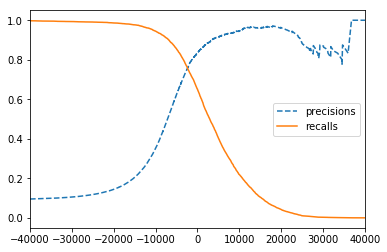

In [123]:
plot_precision_recall_threshold(precisions,recalls,thresholds)
plt.legend()
plt.show()

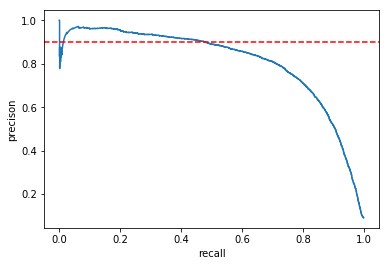

In [130]:
#plot recall vs precision curve
plt.plot(recalls,precisions)
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xlabel('recall')
plt.ylabel('precison')
plt.show()

In [137]:
import numpy as np
#if we want 90% precision
thresholds_90_precis=thresholds[np.argmax(precisions>=0.9)]

In [138]:
thresholds_90_predict=(y_scores>=thresholds_90_precis).astype(int)

In [139]:
precision_score(y_train_5,thresholds_90_predict)

0.9000345901072293

In [140]:
recall_score(y_train_5,thresholds_90_predict)

0.4799852425751706

## ROC-Curve

In [145]:
#ROC for SGDClassifier
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(y_train_5,y_scores)

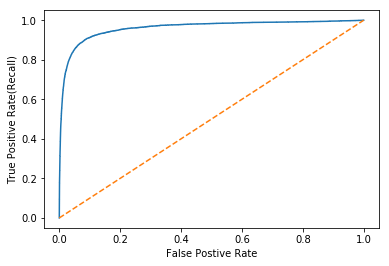

In [156]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate(Recall)')
plt.show()

In [157]:
from sklearn.metrics import roc_auc_score

In [167]:
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

No matter ROC AUC or PRAUC, remember to use y_train and y_score ( y_predit_prob or y decision functions not y_predict)